In [1]:
import sys
module_path = '/Users/fenghaijie/Desktop/360金融/01 金融大脑对外模型/200430第二批23w样本(201910-11)/fhj_risk_modeling/'
if not module_path in sys.path:
    sys.path.append(module_path)
import os
import time
import datetime
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from exploratory_data_analysis import *
from ks_evaluation import *
from model_fitting import *
from feature_process import *
from stability_evaluation import *
import weight_of_evidence as pywoe
import logistic_regression as pylr

In [4]:
df = pd.read_csv('201910_11_fhj_23w_sample.csv')
print(df.shape)
df.head()

(132814, 74)


,appl_no,appl_time,credit_month,loan_time,loan_month,fpd10,class,multi_draw_del_30,first_draw_del_30,del_30,...,mob_MD044N,mob_MD044S,mob_MD044T,mob_MD04EZ,mob_MD04F1,mob_MD04F2,mob_MD04F3,mob_MD04F4,rand,sample
0,2019102000000316,2019-10-20 01:40:31.0,2019-10,2019-10-21 10:35:38.0,2019-10,0,good+,0,0,0,...,NaN,1.0,97.0,14.319580,NaN,NaN,NaN,NaN,0.905640,INS
1,2019102000000879,2019-10-20 07:34:10.0,2019-10,2019-10-20 07:38:33.0,2019-10,0,good+,0,0,0,...,-1.0,1.0,97.0,12.547199,0.788298,0.479232,0.117380,566.0,0.686254,INS
2,2019102000001383,2019-10-20 08:43:23.0,2019-10,2019-10-21 18:35:56.0,2019-10,0,good+,0,0,0,...,6.0,1.0,97.0,6.481055,0.810704,0.516109,0.072038,599.0,0.766509,INS
3,2019102000001751,2019-10-20 01:15:10.0,2019-10,2019-10-20 06:31:17.0,2019-10,0,good+,0,0,0,...,-1.0,0.0,37.0,12.064988,0.941873,0.586174,0.007535,731.0,0.904616,INS
4,2019102000002683,2019-10-20 08:34:11.0,2019-10,2019-10-20 15:58:00.0,2019-10,0,good+,0,0,0,...,NaN,1.0,97.0,28.729575,NaN,NaN,NaN,NaN,0.259827,INS


In [5]:
(min(df['appl_time']), max(df['appl_time']))

('2019-10-20 00:00:10.0', '2019-11-30 23:59:56.0')

In [6]:
df.columns

Index(['appl_no', 'appl_time', 'credit_month', 'loan_time', 'loan_month',
       'fpd10', 'class', 'multi_draw_del_30', 'first_draw_del_30', 'del_30',
       'brAlsAvgMonnumM12', 'brAlsAvgMonnumM3', 'brAlsAvgMonnumM6',
       'brAlsBankAllnumM12', 'brAlsBankAvgMonnumM12', 'brAlsBankMaxMonnumM12',
       'brAlsBankOrgnumM12', 'brAlsBankTotMonsM12', 'brAlsBankTraAllnumM12',
       'brAlsBankTraOrgnumM12', 'brAlsFstBankInteday', 'brAlsFstNobankInteday',
       'brAlsLstBankConsnum', 'brAlsLstBankCsinteday', 'brAlsLstBankInteday',
       'brAlsLstNobankConsnum', 'brAlsLstNobankCsinteday',
       'brAlsLstNobankInteday', 'brAlsMaxIntedayM12', 'brAlsMaxMonnumM12',
       'brAlsMaxMonnumM3', 'brAlsMaxMonnumM6', 'brAlsNobankAllnumM12',
       'brAlsNobankAllnumM6', 'brAlsNobankAvgMonnumM12',
       'brAlsNobankAvgMonnumM6', 'brAlsNobankMaxMonnumM12',
       'brAlsNobankMaxMonnumM6', 'brAlsNobankOrgnumM12', 'brAlsNobankOrgnumM6',
       'brAlsNobankTotMonsM12', 'brAlsNobankTotMonsM6', 'brAlsRel

In [8]:
unuse_cols = ['appl_no', 'appl_time', 'credit_month', 'loan_time', 'loan_month',
              'fpd10', 'class', 'multi_draw_del_30', 'first_draw_del_30', 'del_30', 'rand', 'sample']
feat_cols = sorted(list(set(df.columns) - set(unuse_cols)))
feat_cols

['brAlsAvgMonnumM12',
 'brAlsAvgMonnumM3',
 'brAlsAvgMonnumM6',
 'brAlsBankAllnumM12',
 'brAlsBankAvgMonnumM12',
 'brAlsBankMaxMonnumM12',
 'brAlsBankOrgnumM12',
 'brAlsBankTotMonsM12',
 'brAlsBankTraAllnumM12',
 'brAlsBankTraOrgnumM12',
 'brAlsFstBankInteday',
 'brAlsFstNobankInteday',
 'brAlsLstBankConsnum',
 'brAlsLstBankCsinteday',
 'brAlsLstBankInteday',
 'brAlsLstNobankConsnum',
 'brAlsLstNobankCsinteday',
 'brAlsLstNobankInteday',
 'brAlsMaxIntedayM12',
 'brAlsMaxMonnumM12',
 'brAlsMaxMonnumM3',
 'brAlsMaxMonnumM6',
 'brAlsNobankAllnumM12',
 'brAlsNobankAllnumM6',
 'brAlsNobankAvgMonnumM12',
 'brAlsNobankAvgMonnumM6',
 'brAlsNobankMaxMonnumM12',
 'brAlsNobankMaxMonnumM6',
 'brAlsNobankOrgnumM12',
 'brAlsNobankOrgnumM6',
 'brAlsNobankTotMonsM12',
 'brAlsNobankTotMonsM6',
 'brAlsRelAllnumM12',
 'brAlsRelAllnumM6',
 'brAlsRelOrgnumM12',
 'brAlsRelOrgnumM6',
 'brAlsTotMonsM12',
 'brAlsTotMonsM3',
 'brAlsTotMonsM6',
 'mob_CF_IDSS',
 'mob_D005',
 'mob_D006',
 'mob_D007',
 'mob_D008',


# bad rate分布统计

In [12]:
target_df = target_rate_stat(
    input_df=df,
    target_var_list=['fpd10', 'del_30', 'multi_draw_del_30', 'first_draw_del_30'],
    group_var='credit_month',
    group_list=None,
    save_file_path=None,
)
target_df

,group,total,effs,effs_rate,inters,goods,bads,odds,bad_rate,bad_def
0,2019-10,54263,54263,1.0,0,53784,479,0.008906,0.008827,fpd10
1,2019-11,78551,78551,1.0,0,78011,540,0.006922,0.006875,fpd10
0,2019-10,54263,54263,1.0,0,52494,1769,0.033699,0.032600,del_30
1,2019-11,78551,78551,1.0,0,76211,2340,0.030704,0.029790,del_30
0,2019-10,54263,54263,1.0,0,49330,4933,0.100000,0.090909,multi_draw_del_30
1,2019-11,78551,78551,1.0,0,72490,6061,0.083612,0.077160,multi_draw_del_30
0,2019-10,54263,54263,1.0,0,49403,4860,0.098375,0.089564,first_draw_del_30
1,2019-11,78551,78551,1.0,0,72597,5954,0.082014,0.075798,first_draw_del_30


In [13]:
def row_group(row):
    apply_time = 'appl_time'
    if row[apply_time] >= '2019-10-20' and row[apply_time] < '2019-11-15':
        if row['rand'] >= 0.2:
            return 'INS'   
        else:
            return 'OOS'   
    else:
        return 'OOT'

In [51]:
random.seed(10)
df.loc[:, 'rand'] = [random.random() for i in range(len(df))]
df.loc[:, 'sample'] = df.apply(row_group, axis=1)
set(df['sample'])

{'INS', 'OOS', 'OOT'}

In [52]:
target_df = target_rate_stat(
    input_df=df,
    target_var_list=['fpd10', 'del_30', 'multi_draw_del_30', 'first_draw_del_30'],
    group_var='sample',
    group_list=None,
    save_file_path=None,
)
target_df

,group,total,effs,effs_rate,inters,goods,bads,odds,bad_rate,bad_def
0,INS,77392,77392,1.0,0,76768,624,0.008128,0.008063,fpd10
1,OOS,19262,19262,1.0,0,19109,153,0.008007,0.007943,fpd10
2,OOT,36160,36160,1.0,0,35918,242,0.006738,0.006692,fpd10
0,INS,77392,77392,1.0,0,74888,2504,0.033437,0.032355,del_30
1,OOS,19262,19262,1.0,0,18678,584,0.031267,0.030319,del_30
2,OOT,36160,36160,1.0,0,35139,1021,0.029056,0.028236,del_30
0,INS,77392,77392,1.0,0,70725,6667,0.094267,0.086146,multi_draw_del_30
1,OOS,19262,19262,1.0,0,17681,1581,0.089418,0.082079,multi_draw_del_30
2,OOT,36160,36160,1.0,0,33414,2746,0.082181,0.075940,multi_draw_del_30
0,INS,77392,77392,1.0,0,70834,6558,0.092583,0.084737,first_draw_del_30


# 样本划分

In [53]:
dev_ins = df[df['sample'] == 'INS']
dev_oos = df[df['sample'] == 'OOS']

# 缺失率统计

In [89]:
miss_df = missing_rate_stat(input_df=df, var_list=feat_cols, group_var='credit_month')
miss_df

,2019-10,2019-11,mean,std,cv
mob_MD043T,0.623703,0.600247,0.611975,0.016586,0.027058
brAlsBankTraOrgnumM12,0.583823,0.578389,0.581106,0.003843,0.006602
brAlsBankTraAllnumM12,0.583823,0.578389,0.581106,0.003843,0.006602
brAlsRelAllnumM6,0.588283,0.568293,0.578288,0.014135,0.024400
brAlsRelOrgnumM6,0.588283,0.568293,0.578288,0.014135,0.024400
...,...,...,...,...,...
mob_MD044T,0.392183,0.396952,0.394567,0.003373,0.008526
mob_CF_IDSS,0.384885,0.388945,0.386915,0.002871,0.007401
brAlsMaxMonnumM12,0.318762,0.312065,0.315414,0.004736,0.014967
brAlsTotMonsM12,0.318762,0.312065,0.315414,0.004736,0.014967


In [78]:
a = ['mob_CF_IDSS'
,'mob_D005'
,'mob_D006'
,'mob_D007'
,'mob_D009'
,'mob_D012'
,'mob_D018'
,'mob_D019'
,'mob_D023'
,'mob_MD000H'
,'mob_MD042K'
,'mob_MD042M'
,'mob_MD043T'
,'mob_MD044N'
,'mob_MD044S'
,'mob_MD044T'
,'mob_MD04EZ'
,'mob_MD04F1'
,'mob_MD04F2']

In [79]:
miss_df[miss_df.index.isin(a)]

,2019-10,2019-11,mean,std,cv
mob_MD043T,0.604921,0.580347,0.592634,0.017376,0.029271
mob_D005,0.452056,0.453887,0.452972,0.001295,0.002852
mob_D006,0.452056,0.453887,0.452972,0.001295,0.002852
mob_D007,0.452056,0.453887,0.452972,0.001295,0.002852
mob_D009,0.452056,0.453887,0.452972,0.001295,0.002852
mob_D019,0.452056,0.453887,0.452972,0.001295,0.002852
mob_D023,0.452056,0.453887,0.452972,0.001295,0.002852
mob_MD000H,0.452056,0.453887,0.452972,0.001295,0.002852
mob_MD042M,0.452056,0.453887,0.452972,0.001295,0.002852
mob_MD044N,0.452056,0.453887,0.452972,0.001295,0.002852


In [91]:
miss_df.to_csv('200518_ml/单变量缺失率.csv')

# 数据分布EDD

In [17]:
edd_df = edd_for_continue_var(
    input_df=df,
    var_list=feat_cols,
    group_var='credit_month',
    group_list=None,
    save_file_path=None,
)
edd_df

,group,total,cover_cnt,cover_rate,zero_cnt,zero_rate,min,25%,50%,75%,max,mean,std
brAlsAvgMonnumM12,2019-10,54263,36966,0.681238,0,0.000000,1.000000,1.000000,1.000000,1.500000,9.000000,1.360977,0.560527
brAlsAvgMonnumM12,2019-11,78551,54038,0.687935,0,0.000000,1.000000,1.000000,1.000000,1.500000,8.000000,1.369137,0.576414
brAlsAvgMonnumM3,2019-10,54263,23677,0.436338,0,0.000000,1.000000,1.000000,1.000000,2.000000,9.000000,1.479652,0.769548
brAlsAvgMonnumM3,2019-11,78551,34918,0.444526,0,0.000000,1.000000,1.000000,1.000000,2.000000,10.000000,1.516241,0.819668
brAlsAvgMonnumM6,2019-10,54263,31043,0.572084,0,0.000000,1.000000,1.000000,1.000000,1.670000,9.000000,1.401872,0.640507
...,...,...,...,...,...,...,...,...,...,...,...,...,...
mob_MD04F2,2019-11,78551,41315,0.525964,0,0.000000,0.366027,0.497511,0.513029,0.544692,0.764578,0.520615,0.040591
mob_MD04F3,2019-10,54263,28699,0.528887,2,0.000070,0.000000,0.042248,0.067361,0.084370,0.361315,0.068056,0.035018
mob_MD04F3,2019-11,78551,41315,0.525964,10,0.000242,0.000000,0.039652,0.063308,0.080211,0.361184,0.064999,0.034006
mob_MD04F4,2019-10,54263,28699,0.528887,0,0.000000,477.000000,588.000000,603.000000,634.000000,800.000000,612.355727,39.899012


In [18]:
edd_df.to_csv('200518_ml/单变量edd.csv')

# 单变量IV

In [19]:
iv_df = iv_grouply_table(
    input_df=df,
    target_var='del_30',
    var_list=feat_cols,
    group_var='credit_month',
    group_list=None,
    bin_num=5,
    detail=False,
    save_file_path=None,
)
iv_df

,var,2019-10,2019-11,mean,std,cv,iv_rank,target
28,brAlsNobankOrgnumM12,0.133006,0.205836,0.169421,0.051499,0.302185,1,del_30
29,brAlsNobankOrgnumM6,0.111366,0.175480,0.143423,0.045336,0.313909,2,del_30
22,brAlsNobankAllnumM12,0.086081,0.161044,0.123563,0.053007,0.425545,3,del_30
23,brAlsNobankAllnumM6,0.088468,0.148485,0.118477,0.042438,0.355198,4,del_30
17,brAlsLstNobankInteday,0.099993,0.134213,0.117103,0.024198,0.204885,5,del_30
...,...,...,...,...,...,...,...,...
57,mob_MD04EZ,0.005238,0.003468,0.004353,0.001251,0.233789,58,del_30
54,mob_MD044N,0.007105,0.001251,0.004178,0.004139,0.799452,59,del_30
39,mob_CF_IDSS,0.003938,0.001754,0.002846,0.001545,0.401616,60,del_30
55,mob_MD044S,0.003894,0.001720,0.002807,0.001537,0.403726,61,del_30


In [94]:
iv_df.to_csv('200518_ml/单变IV.csv')

# 单变量KS

In [20]:
ks_df = ks_grouply_calculate(
    input_df=df,
    target_var='del_30',
    group_var='credit_month',
    group_list=None,
    var_list=feat_cols,
    save_file_path=None,
)
ks_df

,2019-10,2019-11,mean,std,cv,target
brAlsLstNobankInteday,0.1435,0.1672,0.15535,0.016758,0.101351,del_30
brAlsNobankAllnumM6,0.1200,0.1590,0.13950,0.027577,0.184463,del_30
brAlsNobankOrgnumM6,0.1199,0.1589,0.13940,0.027577,0.184586,del_30
brAlsNobankAvgMonnumM6,0.1200,0.1586,0.13930,0.027294,0.182815,del_30
brAlsNobankMaxMonnumM6,0.1200,0.1586,0.13930,0.027294,0.182815,del_30
...,...,...,...,...,...,...
mob_MD044N,0.0369,0.0158,0.02635,0.014920,0.410453,del_30
mob_D023,0.0369,0.0139,0.02540,0.016263,0.459420,del_30
mob_CF_IDSS,0.0303,0.0203,0.02530,0.007071,0.200314,del_30
mob_MD044T,0.0303,0.0202,0.02525,0.007142,0.202604,del_30


In [21]:
ks_df.to_csv('200518_ml/单变量ks.csv')

## 单变量PSI

In [22]:
psi_df = psi_grouply_table(
    input_df=df,
    group_var='credit_month',
    benchmark_list=['2019-10'],
    compare_list=None,
    c_var_list=feat_cols,
    d_var_list=None,
    save_file_path=None,
    progress=False,
)
psi_df

,2019-11,mean,max,benchmark
mob_MD044S,0,0.0000,0.0000,2019-10
brAlsTotMonsM6,0.0001,0.0001,0.0001,2019-10
brAlsTotMonsM3,0.0001,0.0001,0.0001,2019-10
brAlsRelAllnumM12,0.0003,0.0003,0.0003,2019-10
mob_MD044T,0.0003,0.0003,0.0003,2019-10
...,...,...,...,...
brAlsLstNobankInteday,0.0457,0.0457,0.0457,2019-10
brAlsFstNobankInteday,0.046,0.0460,0.0460,2019-10
brAlsLstBankCsinteday,999999,999999.0000,999999.0000,2019-10
brAlsLstNobankCsinteday,999999,999999.0000,999999.0000,2019-10


In [26]:
psi_df = psi_grouply_table(
    input_df=df,
    group_var='sample',
    benchmark_list=['INS'],
    compare_list=None,
    c_var_list=feat_cols,
    d_var_list=None,
    save_file_path=None,
    progress=False,
)
psi_df

,OOS,OOT,mean,max,benchmark
mob_MD044S,0.0001,0.0001,0.0001,0.0001,INS
brAlsTotMonsM3,0.0003,0.0002,0.0002,0.0003,INS
brAlsTotMonsM6,0.0007,0.0003,0.0005,0.0007,INS
mob_MD044T,0.0003,0.0007,0.0005,0.0007,INS
brAlsNobankTotMonsM12,0.0003,0.0007,0.0005,0.0007,INS
...,...,...,...,...,...
brAlsLstNobankInteday,0.0005,0.0427,0.0216,0.0427,INS
brAlsFstNobankInteday,0.0008,0.0489,0.0248,0.0489,INS
mob_CF_IDSS,0,3.9971,1.9986,3.9971,INS
brAlsLstBankCsinteday,999999,999999,999999.0000,999999.0000,INS


In [31]:
set(df['brAlsLstBankCsinteday'].dropna())

{1.0}

In [32]:
set(df['brAlsLstNobankCsinteday'].dropna())

{1.0}

In [24]:
psi_df.to_csv('200518_ml/单变量psi.csv')

In [28]:
psi_delete_feats = list(psi_df[psi_df['mean'] > 0.1].index)
psi_delete_feats

['mob_CF_IDSS', 'brAlsLstBankCsinteday', 'brAlsLstNobankCsinteday']

# 机器学习模型

In [41]:
from sklearn.ensemble import RandomForestClassifier
# import xgboost as xgb

In [104]:
final_feat_cols = sorted(list(set(feat_cols) - 
                              set(psi_delete_feats + ['mob_D018', 'mob_MD000H', 'mob_MD042K', 'mob_MD043T'])))
print(len(final_feat_cols))
final_feat_cols

55


['brAlsAvgMonnumM12',
 'brAlsAvgMonnumM3',
 'brAlsAvgMonnumM6',
 'brAlsBankAllnumM12',
 'brAlsBankAvgMonnumM12',
 'brAlsBankMaxMonnumM12',
 'brAlsBankOrgnumM12',
 'brAlsBankTotMonsM12',
 'brAlsBankTraAllnumM12',
 'brAlsBankTraOrgnumM12',
 'brAlsFstBankInteday',
 'brAlsFstNobankInteday',
 'brAlsLstBankConsnum',
 'brAlsLstBankInteday',
 'brAlsLstNobankConsnum',
 'brAlsLstNobankInteday',
 'brAlsMaxIntedayM12',
 'brAlsMaxMonnumM12',
 'brAlsMaxMonnumM3',
 'brAlsMaxMonnumM6',
 'brAlsNobankAllnumM12',
 'brAlsNobankAllnumM6',
 'brAlsNobankAvgMonnumM12',
 'brAlsNobankAvgMonnumM6',
 'brAlsNobankMaxMonnumM12',
 'brAlsNobankMaxMonnumM6',
 'brAlsNobankOrgnumM12',
 'brAlsNobankOrgnumM6',
 'brAlsNobankTotMonsM12',
 'brAlsNobankTotMonsM6',
 'brAlsRelAllnumM12',
 'brAlsRelAllnumM6',
 'brAlsRelOrgnumM12',
 'brAlsRelOrgnumM6',
 'brAlsTotMonsM12',
 'brAlsTotMonsM3',
 'brAlsTotMonsM6',
 'mob_D005',
 'mob_D006',
 'mob_D007',
 'mob_D008',
 'mob_D009',
 'mob_D012',
 'mob_D019',
 'mob_D023',
 'mob_MD0003',
 'm

In [54]:
target_var = 'del_30'

In [105]:
rf = RandomForestClassifier(
         n_estimators=300
        ,max_features='sqrt'
        ,max_depth=3
        ,min_samples_leaf=240
)
trained_rf = train_model(model=rf, 
                         X_train=dev_ins[final_feat_cols].fillna(999999), 
                         y_train=dev_ins[target_var], 
                         X_valid=dev_oos[final_feat_cols].fillna(999999), 
                         y_valid=dev_oos[target_var])

模型开始训练中...
Running time: 0.2741 Minutes
输出模型训练结果...
KS Value  (INS): 0.2044
Accuracy  (INS): 0.9676
AUC Score (INS): 0.633230
--------------------
KS Value  (INS): 0.1815
Accuracy  (OOS): 0.9697
AUC Score (OOS): 0.616111
训练完成


累积score达到0.95时的特征序号为29


,var,score,score_rank,topk
0,brAlsLstNobankInteday,0.093806,1,
1,brAlsNobankOrgnumM12,0.088533,2,
2,brAlsNobankAvgMonnumM6,0.080598,3,
3,brAlsNobankAvgMonnumM12,0.075116,4,
4,brAlsNobankOrgnumM6,0.067584,5,
5,brAlsNobankMaxMonnumM6,0.053922,6,
6,brAlsNobankAllnumM6,0.046625,7,
7,brAlsNobankMaxMonnumM12,0.046300,8,
8,mob_MD04F4,0.042029,9,
9,brAlsNobankAllnumM12,0.038897,10,


In [76]:
br_data_dict = pd.read_csv('/Users/fenghaijie/Desktop/360金融/01 金融大脑对外模型/数据字典/百融数据字典.csv', sep='\t')
br_data_dict

,变量名,变量名（中文）,变量分类,加工逻辑,类型
0,flagBrCreditXgScoreSA,产品输出标识_淇馥百融信用评分SA,百融_qfmBrC001,直接映射，若原始输入项缺失则按默认值补缺,string
1,brCreditXgScoreSA,淇馥百融信用评分SA,百融_qfmBrC001,直接映射，若原始输入项缺失则按默认值补缺,string
2,flagBrFraudScScoreSA,产品输出标识_淇馥百融欺诈评分SA,百融_qfmBrC002,直接映射，若原始输入项缺失则按默认值补缺,string
3,brFraudScScoreSA,淇馥百融欺诈评分SA,百融_qfmBrC002,直接映射，若原始输入项缺失则按默认值补缺,string
4,flagBrApplyLoanStr,产品输出标识_百融借贷意向验证,百融_qfmBrF001,直接映射，若原始输入项缺失则按默认值补缺,string
...,...,...,...,...,...
884,brElSx9RegDate,失信案件9立案时间,百融_qfmBrF001,直接映射，若原始输入项缺失则按默认值补缺,string
885,brElXg10PublishDate,限高案件10发布时间,百融_qfmBrF001,直接映射，若原始输入项缺失则按默认值补缺,string
886,brElXg10RegDate,限高案件10立案时间,百融_qfmBrF001,直接映射，若原始输入项缺失则按默认值补缺,string
887,brElSx10PublishDate,失信案件10发布时间,百融_qfmBrF001,直接映射，若原始输入项缺失则按默认值补缺,string


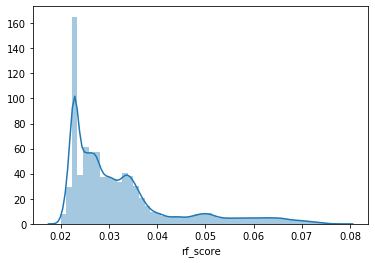

In [107]:
df['rf_score'] = list(trained_rf.predict_proba(df[final_feat_cols].fillna(999999))[:, 1])
sns.distplot(df['rf_score'])

# 模型KS评估

In [108]:
model_ks_df = None
for target in ['fpd10', 'del_30', 'multi_draw_del_30', 'first_draw_del_30']:
    tmp = ks_grouply_calculate(
        input_df=df,
        target_var=target,
        group_var='sample',
        group_list=None,
        var_list=['rf_score'],
        save_file_path=None,
    )
    model_ks_df = pd.concat([model_ks_df, tmp])
model_ks_df

,INS,OOS,OOT,mean,std,cv,target
rf_score,0.1498,0.0991,0.2121,0.153667,0.056599,0.345820,fpd10
rf_score,0.2044,0.1815,0.2245,0.203467,0.021515,0.100789,del_30
rf_score,0.3973,0.4065,0.4285,0.410767,0.016032,0.038101,multi_draw_del_30
rf_score,0.4035,0.4097,0.4341,0.415767,0.016177,0.037995,first_draw_del_30


In [109]:
ks_group_table = ks_grouply_table(input_df=df, score_var='rf_score', target_var='del_30',
                     loan_var=None, eff_var=None, 
                     bins=10, bin_mode=3, group_var='sample', group_list=None,
                     score_bmk_list=df[df['sample'] == 'INS']['rf_score'], 
                     bin_break_list=None, ascending=False,
                     save_file_path=None)
ks_group_table

,bucket,min_score,max_score,delta_score,total,total_rate,rejects,reject_rate,loans,loan_rate,...,cum_bad_rate,cum_good_rate,odds,lift,cum_lift,ks_sign,ks,max_ks,group,bin_mode
0,1,0.050322,0.078053,0.027731,7740.0,10.00%,0.0,0.00%,7740.0,100.00%,...,22.08%,9.60%,0.0769,2.2082,2.2082,+,12.49,,INS,ins_ef_base
1,2,0.037328,0.050319,0.012992,7739.0,10.00%,0.0,0.00%,7739.0,100.00%,...,38.06%,19.40%,0.0545,1.5975,1.9029,+,18.66,,INS,ins_ef_base
2,3,0.034029,0.037327,0.003298,7739.0,10.00%,0.0,0.00%,7739.0,100.00%,...,49.48%,29.35%,0.0384,1.1422,1.6493,+,20.13,<<<<<<,INS,ins_ef_base
3,4,0.031230,0.034029,0.002798,7739.0,10.00%,0.0,0.00%,7739.0,100.00%,...,59.11%,39.36%,0.0321,0.9625,1.4776,+,19.74,,INS,ins_ef_base
4,5,0.028674,0.031230,0.002556,7739.0,10.00%,0.0,0.00%,7739.0,100.00%,...,68.01%,49.40%,0.0297,0.8906,1.3602,+,18.61,,INS,ins_ef_base
5,6,0.026828,0.028673,0.001846,7739.0,10.00%,0.0,0.00%,7739.0,100.00%,...,75.40%,59.48%,0.0245,0.7388,1.2566,+,15.91,,INS,ins_ef_base
6,7,0.024952,0.026828,0.001875,7713.0,9.97%,0.0,0.00%,7713.0,100.00%,...,82.03%,69.56%,0.0220,0.6652,1.1724,+,12.47,,INS,ins_ef_base
7,8,0.023048,0.024952,0.001904,7765.0,10.03%,0.0,0.00%,7765.0,100.00%,...,87.86%,79.74%,0.0192,0.5811,1.0982,+,8.12,,INS,ins_ef_base
8,9,0.022709,0.023048,0.000339,2417.0,3.12%,0.0,0.00%,2417.0,100.00%,...,89.58%,82.91%,0.0181,0.5499,1.0776,+,6.67,,INS,ins_ef_base
9,10,0.020037,0.022708,0.002671,13061.0,16.88%,0.0,0.00%,13061.0,100.00%,...,100.00%,100.00%,0.0204,0.6176,1.0000,+,0.00,,INS,ins_ef_base


In [99]:
ks_group_table.to_csv('200518_ml/模型ks-table.csv')

# 模型PSI评估

In [100]:
psi_grouply_table(
    input_df=df,
    group_var='sample',
    benchmark_list=['INS'],
    compare_list=None,
    c_var_list=['rf_score'],
    d_var_list=None,
    save_file_path=None,
    progress=False,
)

,OOS,OOT,mean,max,benchmark
rf_score,0.0004,0.0028,0.0016,0.0028,INS


In [110]:
psi_grouply_table(
    input_df=df,
    group_var='credit_month',
    benchmark_list=['2019-10'],
    compare_list=None,
    c_var_list=['rf_score'],
    d_var_list=None,
    save_file_path=None,
    progress=False,
)

,2019-11,mean,max,benchmark
rf_score,0.0029,0.0029,0.0029,2019-10


# 模型文件保存

In [68]:
import pickle
def pkl_save(model, save_file_path):
    '''
    ----------------------------------------------------------------------
    功能：将训练完成的模型保存为pkl文件
    ----------------------------------------------------------------------
    :param model: sklearn机器学习包实例化后训练完毕的模型
    :param save_file_path: str, 保存模型文件的目标路径
    ----------------------------------------------------------------------
    :return None
    ----------------------------------------------------------------------
    '''
    if not save_file_path.endswith('.pkl'):
        raise Exception('参数save_file_path后缀必须为pkl, 请检查！')
        
    with open(save_file_path, 'wb') as f:
        pickle.dump(model, f, protocol=2)
    f.close()
    
    print('模型文件已保存至{}'.format(save_file_path))

In [70]:
pkl_save(model=trained_rf, save_file_path='200518_ml/fhj_jrdn_v2_rf_model_del30.pkl')

模型文件已保存至200518_ml/fhj_jrdn_v2_rf_model_del30.pkl


# 跨期测试

In [73]:
oot = pd.read_csv('201904_05_jrdn_v1_sample_oot.csv')
oot.head()

,appl_no,applyTime,del_30,fpd10,spd15,fipd30,has_plan,is_fraud_bad,is_credit_bad,loan_date,...,mob_md000h,mob_md042k,mob_md042m,mob_md043t,mob_md044n,mob_md044s,mob_md044t,mob_md04ez,mob_md04f1,mob_md04f2
0,2019040100000438,2019-04-01 00:30:38,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019-04-04,...,20170109,20190301,-1.0,3199.0,-1.0,1.0,97.0,15.630,0.8145,0.5090
1,2019040100000718,2019-04-01 00:53:44,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019-04-01,...,20150725,20190304,3.0,2699.0,3.0,1.0,97.0,3.758,0.8030,0.4998
2,2019040100001244,2019-04-01 01:51:33,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019040100001542,2019-04-01 00:03:13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019-04-04,...,20190130,20190301,1.0,unknown,-1.0,1.0,97.0,9.766,0.9053,0.5654
4,2019040100001569,2019-04-01 00:04:58,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2019-04-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
oot['credit_month'] = oot['applyTime'].apply(lambda x: str(x)[:7])

In [76]:
oot.columns

Index(['appl_no', 'applyTime', 'del_30', 'fpd10', 'spd15', 'fipd30',
       'has_plan', 'is_fraud_bad', 'is_credit_bad', 'loan_date', 'del_10',
       'brAlsFstNobankInteday', 'brAlsLstBankInteday',
       'brAlsNobankMaxMonnumM12', 'brAlsMaxMonnumM6', 'brAlsLstBankConsnum',
       'brAlsBankMaxMonnumM12', 'brAlsBankTraAllnumM12', 'brAlsTotMonsM6',
       'brAlsBankAllnumM12', 'brAlsMaxMonnumM3', 'brAlsRelAllnumM6',
       'mob_D008', 'brAlsBankAvgMonnumM12', 'brAlsFstBankInteday',
       'mob_MD0003', 'brAlsNobankAllnumM12', 'brAlsNobankTotMonsM12',
       'brAlsNobankMaxMonnumM6', 'mob_MD04F4', 'brAlsLstNobankConsnum',
       'brAlsNobankAvgMonnumM12', 'brAlsMaxMonnumM12', 'brAlsRelOrgnumM6',
       'brAlsAvgMonnumM3', 'brAlsBankTraOrgnumM12', 'mob_MD04F3',
       'brAlsAvgMonnumM6', 'brAlsNobankTotMonsM6', 'brAlsAvgMonnumM12',
       'brAlsLstNobankInteday', 'brAlsTotMonsM12', 'brAlsNobankAllnumM6',
       'brAlsNobankOrgnumM6', 'brAlsMaxIntedayM12', 'brAlsNobankAvgMonnumM6',
      

In [82]:
oot.columns = ['appl_no', 'applyTime', 'del_30', 'fpd10', 'spd15', 'fipd30',
       'has_plan', 'is_fraud_bad', 'is_credit_bad', 'loan_date', 'del_10',
       'brAlsFstNobankInteday', 'brAlsLstBankInteday',
       'brAlsNobankMaxMonnumM12', 'brAlsMaxMonnumM6', 'brAlsLstBankConsnum',
       'brAlsBankMaxMonnumM12', 'brAlsBankTraAllnumM12', 'brAlsTotMonsM6',
       'brAlsBankAllnumM12', 'brAlsMaxMonnumM3', 'brAlsRelAllnumM6',
       'mob_D008', 'brAlsBankAvgMonnumM12', 'brAlsFstBankInteday',
       'mob_MD0003', 'brAlsNobankAllnumM12', 'brAlsNobankTotMonsM12',
       'brAlsNobankMaxMonnumM6', 'mob_MD04F4', 'brAlsLstNobankConsnum',
       'brAlsNobankAvgMonnumM12', 'brAlsMaxMonnumM12', 'brAlsRelOrgnumM6',
       'brAlsAvgMonnumM3', 'brAlsBankTraOrgnumM12', 'mob_MD04F3',
       'brAlsAvgMonnumM6', 'brAlsNobankTotMonsM6', 'brAlsAvgMonnumM12',
       'brAlsLstNobankInteday', 'brAlsTotMonsM12', 'brAlsNobankAllnumM6',
       'brAlsNobankOrgnumM6', 'brAlsMaxIntedayM12', 'brAlsNobankAvgMonnumM6',
       'brAlsNobankOrgnumM12', 'brAlsRelAllnumM12', 'brAlsBankOrgnumM12',
       'brAlsBankTotMonsM12', 'brAlsRelOrgnumM12', 'brAlsTotMonsM3',
       'mob_D005', 'mob_D006', 'mob_D007', 'mob_D009', 'mob_D012', 'mob_D018', 
       'mob_D019', 'mob_D023', 'mob_MD000H', 'mob_MD042K', 'mob_MD042M', 'mob_MD043T',
       'mob_MD044N', 'mob_MD044S', 'mob_MD044T', 'mob_MD04EZ', 'mob_MD04F1', 'mob_MD04F2', 'credit_month']

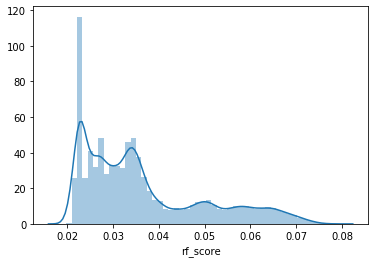

In [114]:
oot['rf_score'] = list(trained_rf.predict_proba(oot[final_feat_cols].fillna(999999))[:, 1])
sns.distplot(oot['rf_score'])

In [85]:
list(oot.dtypes)

[dtype('int64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype(

In [103]:
str_cols = []
for u in oot.columns:
    if oot[u].dtype == object:
        str_cols.append(u)
print('数量: ' + str(len(str_cols)))
print(str_cols)

数量: 7
['applyTime', 'loan_date', 'mob_D018', 'mob_MD000H', 'mob_MD042K', 'mob_MD043T', 'credit_month']


In [115]:
set(oot['credit_month'])

{'2019-04', '2019-05', 'nan'}

In [116]:
model_ks_df = None
for target in ['fpd10', 'del_30']:
    tmp = ks_grouply_calculate(
        input_df=oot,
        target_var=target,
        group_var='credit_month',
        group_list=['2019-04', '2019-05'],
        var_list=['rf_score'],
        save_file_path=None,
    )
    model_ks_df = pd.concat([model_ks_df, tmp])
model_ks_df

,2019-04,2019-05,mean,std,cv,target
rf_score,0.0370,0.0428,0.0399,0.004101,0.082189,fpd10
rf_score,0.1104,0.0842,0.0973,0.018526,0.172658,del_30


In [88]:
oot[str_cols]

,applyTime,loan_date,mob_D018,mob_MD000H,mob_MD042K,mob_MD043T,credit_month
0,2019-04-01 00:30:38,2019-04-04,6.0,20170109,20190301,3199.0,2019-04
1,2019-04-01 00:53:44,2019-04-01,4.4,20150725,20190304,2699.0,2019-04
2,2019-04-01 01:51:33,2019-04-01,NaN,NaN,NaN,NaN,2019-04
3,2019-04-01 00:03:13,2019-04-04,2.3,20190130,20190301,unknown,2019-04
4,2019-04-01 00:04:58,2019-04-01,NaN,NaN,NaN,NaN,2019-04
...,...,...,...,...,...,...,...
159019,2019-05-31 23:31:35,2019-06-03,8.0,20180803.0,20181217.0,unknown,2019-05
159020,2019-05-31 23:58:34,2019-06-06,8.1,20190316.0,20190422.0,4999.0,2019-05
159021,2019-05-31 23:44:24,2019-06-01,7.1,20180318.0,20190418.0,3498.0,2019-05
159022,2019-05-31 23:53:28,2019-06-20,NaN,NaN,NaN,NaN,2019-05


# 跨期特征筛选

In [124]:
tot = pd.concat([df[final_feat_cols + ['credit_month', 'del_30']], oot[final_feat_cols + ['credit_month', 'del_30']]])
tot.head()

,brAlsAvgMonnumM12,brAlsAvgMonnumM3,brAlsAvgMonnumM6,brAlsBankAllnumM12,brAlsBankAvgMonnumM12,brAlsBankMaxMonnumM12,brAlsBankOrgnumM12,brAlsBankTotMonsM12,brAlsBankTraAllnumM12,brAlsBankTraOrgnumM12,...,mob_MD044N,mob_MD044S,mob_MD044T,mob_MD04EZ,mob_MD04F1,mob_MD04F2,mob_MD04F3,mob_MD04F4,credit_month,del_30
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,97.0,14.319580,NaN,NaN,NaN,NaN,2019-10,0.0
1,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,...,-1.0,1.0,97.0,12.547199,0.788298,0.479232,0.117380,566.0,2019-10,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,1.0,97.0,6.481055,0.810704,0.516109,0.072038,599.0,2019-10,0.0
3,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,0.0,37.0,12.064988,0.941873,0.586174,0.007535,731.0,2019-10,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,1.0,97.0,28.729575,NaN,NaN,NaN,NaN,2019-10,0.0


In [125]:
psi_grouply_table(
    input_df=tot,
    group_var='credit_month',
    benchmark_list=['2019-10'],
    compare_list=['2019-04', '2019-05', '2019-10', '2019-11'],
    c_var_list=final_feat_cols,
    d_var_list=None,
    save_file_path=None,
    progress=False,
)

,2019-04,2019-05,2019-10,2019-11,mean,max,benchmark
brAlsLstNobankConsnum,0.0006,0.0022,0,0.0004,0.0008,0.0022,2019-10
brAlsBankTotMonsM12,0.0007,0.0017,0,0.001,0.0008,0.0017,2019-10
brAlsBankOrgnumM12,0.0019,0.0015,0,0.0005,0.0010,0.0019,2019-10
brAlsTotMonsM3,0.001,0.0078,0,0.0001,0.0022,0.0078,2019-10
brAlsBankTraOrgnumM12,0.0064,0.0027,0,0.0003,0.0024,0.0064,2019-10
brAlsBankAllnumM12,0.0032,0.004,0,0.0024,0.0024,0.0040,2019-10
brAlsBankAvgMonnumM12,0.0047,0.0058,0,0.0006,0.0028,0.0058,2019-10
brAlsLstBankConsnum,0.0074,0.0051,0,0.0003,0.0032,0.0074,2019-10
brAlsRelOrgnumM12,0.0047,0.0052,0,0.0037,0.0034,0.0052,2019-10
brAlsRelAllnumM12,0.0073,0.0061,0,0.0003,0.0034,0.0073,2019-10


In [129]:
ks_df = ks_grouply_calculate(
    input_df=tot,
    target_var='del_30',
    group_var='credit_month',
    group_list=['2019-04', '2019-05', '2019-10', '2019-11'],
    var_list=final_feat_cols,
    save_file_path=None,
)
ks_df

,2019-04,2019-05,2019-10,2019-11,mean,std,cv,target
mob_MD04F4,0.1730,0.1575,0.0912,0.0671,0.122200,0.051068,0.386291,del_30
mob_MD04F2,0.1651,0.1533,0.0864,0.0608,0.116400,0.050743,0.401450,del_30
mob_MD04F1,0.1560,0.1412,0.0709,0.0554,0.105875,0.050104,0.432400,del_30
mob_MD04F3,0.1344,0.1370,0.0569,0.0567,0.096250,0.045565,0.428851,del_30
mob_D008,0.1419,0.1370,0.0626,0.0390,0.095125,0.052119,0.495785,del_30
mob_MD0003,0.1344,0.1370,0.0600,0.0446,0.094000,0.048571,0.467032,del_30
mob_D005,0.1344,0.1370,0.0543,0.0400,0.091425,0.051468,0.507444,del_30
mob_D007,0.1390,0.1389,0.0460,0.0384,0.090575,0.055945,0.556249,del_30
brAlsLstNobankInteday,0.0319,0.0187,0.1435,0.1672,0.090325,0.075897,0.756509,del_30
mob_D012,0.1426,0.1395,0.0410,0.0291,0.088050,0.061405,0.626259,del_30


In [130]:
final_feat_cols

['brAlsAvgMonnumM12',
 'brAlsAvgMonnumM3',
 'brAlsAvgMonnumM6',
 'brAlsBankAllnumM12',
 'brAlsBankAvgMonnumM12',
 'brAlsBankMaxMonnumM12',
 'brAlsBankOrgnumM12',
 'brAlsBankTotMonsM12',
 'brAlsBankTraAllnumM12',
 'brAlsBankTraOrgnumM12',
 'brAlsFstBankInteday',
 'brAlsFstNobankInteday',
 'brAlsLstBankConsnum',
 'brAlsLstBankInteday',
 'brAlsLstNobankConsnum',
 'brAlsLstNobankInteday',
 'brAlsMaxIntedayM12',
 'brAlsMaxMonnumM12',
 'brAlsMaxMonnumM3',
 'brAlsMaxMonnumM6',
 'brAlsNobankAllnumM12',
 'brAlsNobankAllnumM6',
 'brAlsNobankAvgMonnumM12',
 'brAlsNobankAvgMonnumM6',
 'brAlsNobankMaxMonnumM12',
 'brAlsNobankMaxMonnumM6',
 'brAlsNobankOrgnumM12',
 'brAlsNobankOrgnumM6',
 'brAlsNobankTotMonsM12',
 'brAlsNobankTotMonsM6',
 'brAlsRelAllnumM12',
 'brAlsRelAllnumM6',
 'brAlsRelOrgnumM12',
 'brAlsRelOrgnumM6',
 'brAlsTotMonsM12',
 'brAlsTotMonsM3',
 'brAlsTotMonsM6',
 'mob_D005',
 'mob_D006',
 'mob_D007',
 'mob_D008',
 'mob_D009',
 'mob_D012',
 'mob_D019',
 'mob_D023',
 'mob_MD0003',
 'm

In [131]:
 tyy = ['brGlMaxListLevelM12',
 'brTlPdlAllnum',
 'mob_MD04F4',
 'brAlsNobankOrgnumM12',
 'mob_MD0003',
 'brAlsMaxMonnumM6',
 'brAlsNobankOrgnumM6',
 'brAlsNobankTotMonsM6',
 'brTlNobankAllOrgnumM2',
 'brAlsLstNobankInteday']

In [132]:
for x in tyy:
    if x in final_feat_cols:
        print(x)

mob_MD04F4
brAlsNobankOrgnumM12
mob_MD0003
brAlsMaxMonnumM6
brAlsNobankOrgnumM6
brAlsNobankTotMonsM6
brAlsLstNobankInteday
